## Analysis of Bigrams

1. Take any corpus(article) of your choice and analyze all the bigrams present based on ConditionalFrequencyDist and compute the co-occurence matrix.
2. Visualize the co-occurence matrix.

In [36]:
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
text = "The Book is Red . Red Book is symbol of danger . The Book is favourite to everyone . Everyone goes to market . Red clothes like everyone . Ram read the Book . "
token=nltk.word_tokenize(text)
bigrams=ngrams(token,2)
bigrams

<generator object ngrams at 0x7f94df272938>

In [37]:
sjf = nltk.ConditionalFreqDist(bigrams)
sjf = pd.DataFrame(sjf).fillna(0)

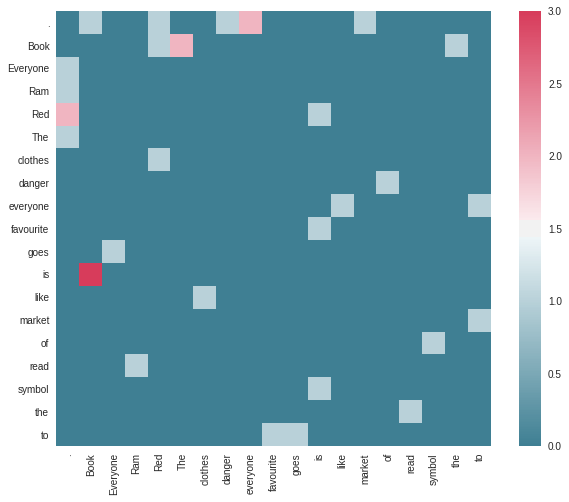

In [38]:
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(sjf, mask = np.zeros_like(sjf, dtype = np.bool),
            cmap = sns.diverging_palette(220, 5, as_cmap = True),
            square = True, ax = ax)
plt.show()

In [39]:
from itertools import tee, islice
from collections import Counter
def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        l = tuple(islice(a, n))
        if len(l) == n:
            yield l
            next(b)
            tlst = b
        else:
            break

p=Counter(ngrams(token, 2))
p

Counter({('.', 'Everyone'): 1,
         ('.', 'Ram'): 1,
         ('.', 'Red'): 2,
         ('.', 'The'): 1,
         ('Book', '.'): 1,
         ('Book', 'is'): 3,
         ('Everyone', 'goes'): 1,
         ('Ram', 'read'): 1,
         ('Red', '.'): 1,
         ('Red', 'Book'): 1,
         ('Red', 'clothes'): 1,
         ('The', 'Book'): 2,
         ('clothes', 'like'): 1,
         ('danger', '.'): 1,
         ('everyone', '.'): 2,
         ('favourite', 'to'): 1,
         ('goes', 'to'): 1,
         ('is', 'Red'): 1,
         ('is', 'favourite'): 1,
         ('is', 'symbol'): 1,
         ('like', 'everyone'): 1,
         ('market', '.'): 1,
         ('of', 'danger'): 1,
         ('read', 'the'): 1,
         ('symbol', 'of'): 1,
         ('the', 'Book'): 1,
         ('to', 'everyone'): 1,
         ('to', 'market'): 1})

In [71]:
x = p.keys()
y = p.values()

a1 = []
a2 = []
x = list(x)
for i in range(0,(len(x))):
    a1.append(x[i][0])
    a2.append(x[i][1])
#df = pd.DataFrame({'word1': list(a1),'word2': list(a2), 'b':list(y)})
word1 = list(a1)

word12= list(a2)
df = pd.DataFrame({'Word1':list(a1), 'Word2':list(a2), 'Value':list(y)})
df = df.pivot(index='Word1', columns='Word2', values='Value').fillna(0)
df

Word2,.,Book,Everyone,Ram,Red,The,clothes,danger,everyone,favourite,goes,is,like,market,of,read,symbol,the,to
Word1,,,,,,,,,,,,,,,,,,,
.,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Book,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Everyone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ram,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Red,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clothes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
danger,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
everyone,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from itertools import tee, islice
from collections import Counter
def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        #print(list(a))
        #print(list(b))
        l = tuple(islice(a, n))
        if len(l) == n:
            yield l
            #print(l)
            next(b)
            #print(next(b))
            tlst = b
            #print(next(tlst))
        else:
            break

p=Counter(ngrams(token, 3))
p

Counter({('.', 'Everyone', 'goes'): 1,
         ('.', 'Ram', 'read'): 1,
         ('.', 'Red', 'Book'): 1,
         ('.', 'Red', 'clothes'): 1,
         ('.', 'The', 'Book'): 1,
         ('Book', 'is', 'Red'): 1,
         ('Book', 'is', 'favourite'): 1,
         ('Book', 'is', 'symbol'): 1,
         ('Everyone', 'goes', 'to'): 1,
         ('Ram', 'read', 'the'): 1,
         ('Red', '.', 'Red'): 1,
         ('Red', 'Book', 'is'): 1,
         ('Red', 'clothes', 'like'): 1,
         ('The', 'Book', 'is'): 2,
         ('clothes', 'like', 'everyone'): 1,
         ('danger', '.', 'The'): 1,
         ('everyone', '.', 'Everyone'): 1,
         ('everyone', '.', 'Ram'): 1,
         ('favourite', 'to', 'everyone'): 1,
         ('goes', 'to', 'market'): 1,
         ('is', 'Red', '.'): 1,
         ('is', 'favourite', 'to'): 1,
         ('is', 'symbol', 'of'): 1,
         ('like', 'everyone', '.'): 1,
         ('market', '.', 'Red'): 1,
         ('of', 'danger', '.'): 1,
         ('read', 'the', 'B

In [41]:
x = p.keys()
y = p.values()

a1 = []
a2 = []
a3=[]
x = list(x)
for i in range(0,(len(x))):
    a1.append(x[i][0])
    a2.append(x[i][1])
    a3.append(x[i][2])
df = pd.DataFrame({'word1': list(a1),'word2': list(a2),'word3' : list(a3),'b':list(y)})
df

IndexError: tuple index out of range